# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from extractors.loader import Loader
loader = Loader(dataDir, 'inD')

In [5]:
from extractors.LocationData import LocationData
loc2data = LocationData.load("../data/location-2")

2022-11-10 17:30:52.061 | INFO     | extractors.LocationData:load:311 - reading from ../data/location-2\all.dill


In [6]:
scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)

In [7]:
clippedCrossing = scene20Data.getClippedPedDfs()

In [8]:
clippedCrossing.head()

index  recordingId  trackId  frame  trackLifetime   xCenter   yCenter  \
0  34563           18       71   4755           1025  41.44605 -34.51528   
1  34564           18       71   4756           1026  41.42466 -34.46142   
2  34565           18       71   4757           1027  41.40413 -34.40850   
3  34566           18       71   4758           1028  41.38463 -34.35678   
4  34567           18       71   4759           1029  41.36614 -34.30632   

     heading  width  length  xVelocity  yVelocity  xAcceleration  \
0  112.58283    0.0     0.0   -0.51156    1.32954        0.16353   
1  113.14327    0.0     0.0   -0.49814    1.30985        0.18442   
2  113.71103    0.0     0.0   -0.48359    1.28906        0.19969   
3  114.28619    0.0     0.0   -0.46830    1.26738        0.20916   
4  114.86884    0.0     0.0   -0.45266    1.24503        0.21281   

   yAcceleration  uniqueTrackId sceneId    sceneX    sceneY  
0       -0.44648          18071      20  2.979945 -3.960070  
1       -0.46504          18071      20  2.974229 -3.902401  
2       -0.48200          18071      20  2.969081 -3.845872  
3       -0.49713          18071      20  2.964592 -3.790781  
4       -0.51030          18071      20  2.960727 -3.737179

In [7]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

2022-10-04 14:00:54.365 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-10-04 14:01:05.757 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png
2022-10-04 14:01:07.550 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


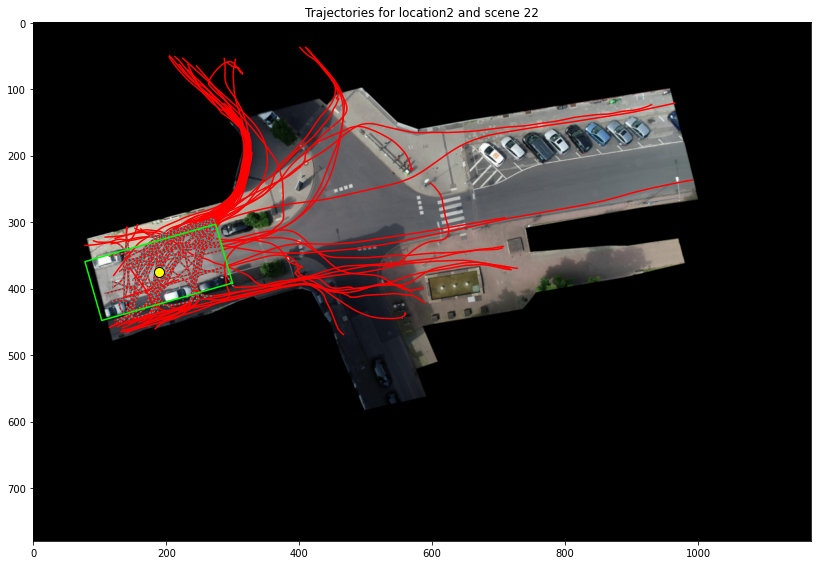

In [10]:
scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

In [8]:
transformerData = loc2data.getCrossingDataForTransformer(refresh=True)

merging scenes: 100%|██████████| 3/3 [00:00<00:00, 72.86it/s]


In [9]:
transformerData.keys()

dict_keys([5.0, 6.0, 9.0])

In [20]:
transformerData[5.0].head()

frame    ped         x         y sceneId  recordingId  roadWidth
0    727  18023  0.451637  3.493368      10           18        5.0
1    728  18023  0.460504  3.454362      10           18        5.0
2    729  18023  0.469409  3.415112      10           18        5.0
3    730  18023  0.478312  3.375372      10           18        5.0
4    731  18023  0.487406  3.334671      10           18        5.0

## Visualising ped trajectories of recording 18 of road width 5.0 meters

In [32]:
recording18 = transformerData[5.0][transformerData[5.0]["recordingId"] == 18]
ped23 = recording18[recording18["ped"] == 18023]
plt.plot(ped23["x"], ped23["y"])

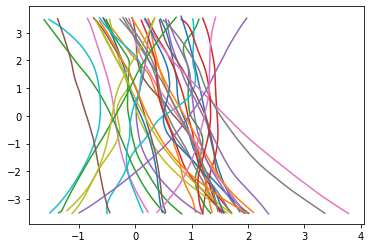

In [46]:
visualizer.showLocalTrajectories(recording18, "ped", "x", "y")

## Visualising ped trajectories of the same road width (all scenes and all recording)

In [47]:
visualizer.showLocalTrajectories(transformerData[5.0], "ped", "x", "y")

## Visualising ped trajectories of the scene 10 and all recording

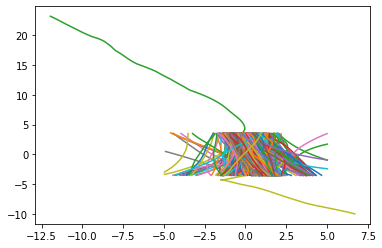

In [52]:
sceneDf = transformerData[5.0][transformerData[5.0]["sceneId"] == '10']
visualizer.showLocalTrajectories(sceneDf, "ped", "x", "y")

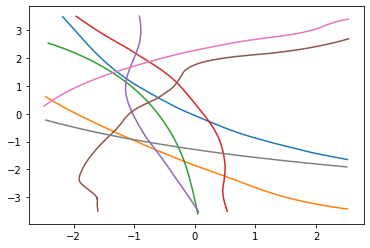

In [54]:
sceneDf = transformerData[5.0][transformerData[5.0]["sceneId"] == '11']
visualizer.showLocalTrajectories(sceneDf, "ped", "x", "y")

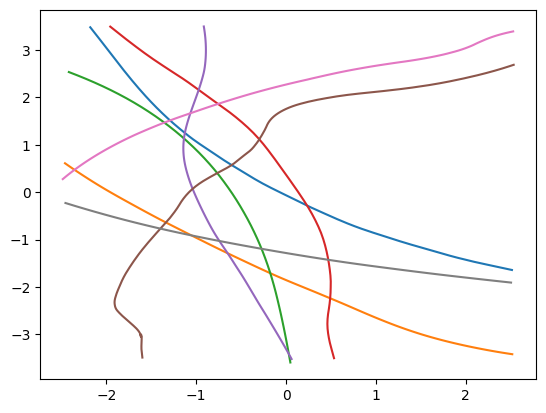

In [10]:
sceneDf = transformerData[5.0][transformerData[5.0]["sceneId"] == '11']
visualizer.showLocalTrajectories(sceneDf, "ped", "x", "y")

In [21]:
df = transformerData[9.0]
# visualizer.showLocalTrajectories(df, "ped", "x", "y")
pedIds = df['ped'].unique()
pedDfs = df[df['ped'].isin(pedIds[10:20])]
visualizer.showLocalTrajectories(pedDfs, "ped", "x", "y")
# for pid in pedIds:
#     pedDf = df[df['ped'] == pid]
#     visualizer.showLocalTrajectories(pedDf, "ped", "x", "y")

In [12]:
df["sceneId"].unique()

array(['21', '22'], dtype=object)

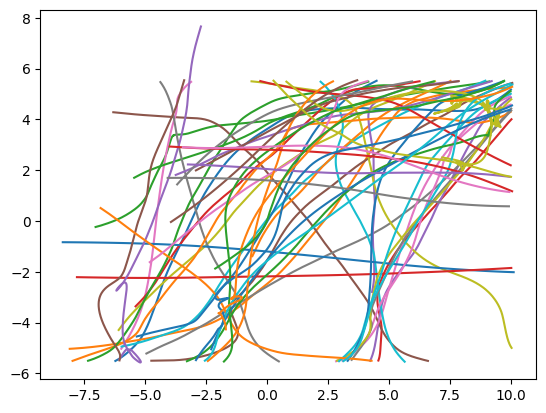

In [14]:
sceneDf = transformerData[9.0][transformerData[9.0]["sceneId"] == '22']
visualizer.showLocalTrajectories(sceneDf, "ped", "x", "y")

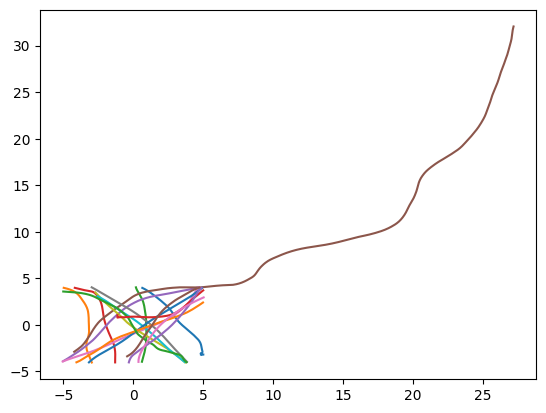

In [22]:
sceneDf = transformerData[6.0][transformerData[6.0]["sceneId"] == '31']
visualizer.showLocalTrajectories(sceneDf, "ped", "x", "y")

In [25]:
transformerData[6.0].head()

frame    ped         x         y sceneId  recordingId  roadWidth
0   4755  18071  2.979945 -3.960070      20           18        6.0
1   4756  18071  2.974229 -3.902401      20           18        6.0
2   4757  18071  2.969081 -3.845872      20           18        6.0
3   4758  18071  2.964592 -3.790781      20           18        6.0
4   4759  18071  2.960727 -3.737179      20           18        6.0